# Model Training


In [4]:
#basic importation
# Core libraries
import numpy as np
import pandas as  pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn modules
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
 


### Import the csv data as pandas dataframe

In [5]:
data = pd.read_csv("data\StudentsPerformance.csv")
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\mwiri\AppData\Local\Temp\ipykernel_1488\2359198076.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv("data\StudentsPerformance.csv")


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y variables

In [8]:
X = data.drop(columns = ["math score"],axis= 1)
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


we have droped our math score , this is our target to predict  the math score according to the other features 

In [9]:
y = data["math score"]
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

y , is our target to predict , math score

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

scaler = StandardScaler()
encoder = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers = [
        ("num",scaler,numerical_features),
        ("cat",encoder,categorical_features)
    ] 
)

X = preprocessor.fit_transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
X.head()
 


,num__reading score,num__writing score,cat__gender_female,cat__gender_male,cat__race/ethnicity_group A,cat__race/ethnicity_group B,cat__race/ethnicity_group C,cat__race/ethnicity_group D,cat__race/ethnicity_group E,cat__parental level of education_associate's degree,cat__parental level of education_bachelor's degree,cat__parental level of education_high school,cat__parental level of education_master's degree,cat__parental level of education_some college,cat__parental level of education_some high school,cat__lunch_free/reduced,cat__lunch_standard,cat__test preparation course_completed,cat__test preparation course_none
0,0.193999,0.391492,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.427476,1.313269,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.770109,1.642475,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.833899,-1.583744,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.605158,0.457333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Training our dataset

In [13]:
#lests separate the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

we aretraining 800 rows and 19 columns and testing 200 rows and 19 columns according to our shape

### Evaluation metrics

In [15]:
# Classification Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# Regression Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Clustering Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score


def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,rmse,r2_square

## Lets Train The Models

In [30]:
 

models = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "SVC": SVC(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "SVR": SVR(),
    "LinearRegression": LinearRegression()
}

model_list = []
r2_list = []

for name, model in models.items():
    try:
        model.fit(X_train, y_train)  # Train the model
        
        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Evaluate Train and Test dataset
        _, _, model_train_r2 = evaluate_model(y_train, y_train_pred)
        _, _, model_test_r2 = evaluate_model(y_test, y_test_pred)
        
        # Store the model name and R2 score
        model_list.append(name)
        r2_list.append(model_test_r2)
        
        # Print metrics
        print(f"{name}")
        print(f"-Train R2 Score: {model_train_r2:.4f}")
        print(f"-Test R2 Score: {model_test_r2:.4f}")
        print("=" * 35)
    except Exception as e:
        print(f"Error with model {name}: {e}")
        continue

 
 

KNeighborsClassifier
-Train R2 Score: 0.5182
-Test R2 Score: 0.4669
DecisionTreeClassifier
-Train R2 Score: 0.9993
-Test R2 Score: 0.6329
RandomForestClassifier
-Train R2 Score: 0.9993
-Test R2 Score: 0.6747
GradientBoostingClassifier
-Train R2 Score: 0.9940
-Test R2 Score: 0.6302
SVC
-Train R2 Score: 0.7024
-Test R2 Score: 0.6097
LogisticRegression
-Train R2 Score: 0.7111
-Test R2 Score: 0.6563
KNeighborsRegressor
-Train R2 Score: 0.8552
-Test R2 Score: 0.7836
DecisionTreeRegressor
-Train R2 Score: 0.9997
-Test R2 Score: 0.7520
RandomForestRegressor
-Train R2 Score: 0.9774
-Test R2 Score: 0.8508
GradientBoostingRegressor
-Train R2 Score: 0.9050
-Test R2 Score: 0.8721
SVR
-Train R2 Score: 0.8081
-Test R2 Score: 0.7286
LinearRegression
-Train R2 Score: 0.8743
-Test R2 Score: 0.8804


# Result

In [31]:
 
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)
 
 

,Model Name,R2_Score
11,LinearRegression,0.880433
9,GradientBoostingRegressor,0.872091
8,RandomForestRegressor,0.850810
6,KNeighborsRegressor,0.783589
7,DecisionTreeRegressor,0.752012
10,SVR,0.728600
2,RandomForestClassifier,0.674733
5,LogisticRegression,0.656322
1,DecisionTreeClassifier,0.632898
3,GradientBoostingClassifier,0.630227


Model List: []


# LinearRegression  

In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


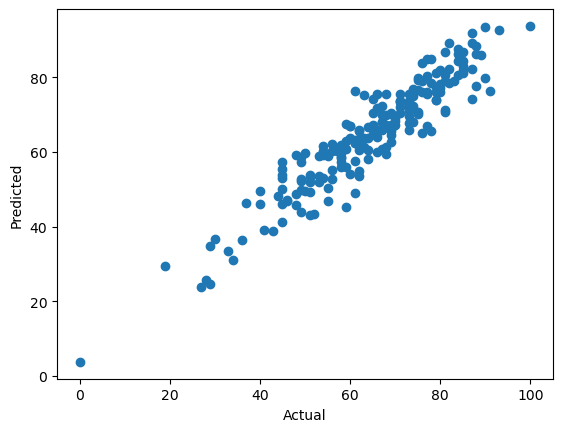

In [33]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel("Actual");
plt.ylabel("Predicted");

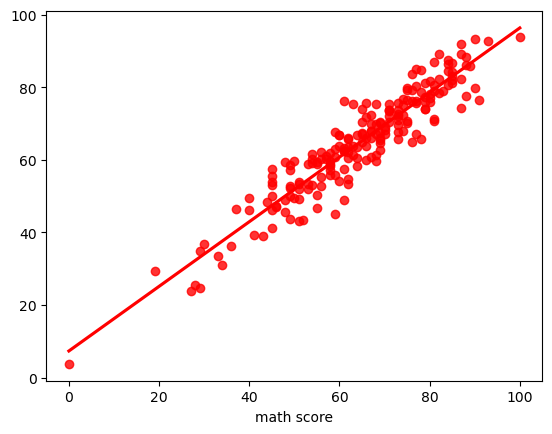

In [34]:
sns.regplot(x=y_test,y=y_pred,ci=None,color = "red");

### Diffrence between actual and predicted values

In [35]:
pred_df = pd.DataFrame({"Actual Value":y_test,"predicted Value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
